#  Import package



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
import cv2
from skimage.feature import hog
from matplotlib import image as mpimg
import glob
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import os
from imutils import paths
from sklearn.preprocessing import LabelEncoder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Machine_Learning/Last_Semester/Iris.csv")
print(data)
training = data.iloc[: 145, 1 :].values
testing = data.iloc[145:, 1:].values

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# Implemment KNN algorithm

In [4]:
class KNeighbors:
  def __init__(self, k_neighbors):
    self.k_neighbors = k_neighbors
  def fit(self, train, test):

    def compute_distance_Manhattan(data_1, data_2):
      score = 0.0
      for value in range(len(data_1) - 1):
        score += abs(float(data_1[value]) - float(data_2[value])) ** 2
      return pow(score, 1/2)
    distances = []
    for items in train:
      distances.append({
          "label" : items[-1],
          "value" : compute_distance_Manhattan(test, items)
      })
    distances.sort(key = lambda x : x["value"])
    labels = [items["label"] for items in distances]
    return labels[:self.k_neighbors]


  def predict(self, labels):
    set_ = set(labels)
    result, max_score = 0, 0
    for item in set_:
      t = labels.count(item)
      tmp = max_score
      max_score = max(max_score, t)
      if max_score != tmp: result = item
    return result

k = 5
model = KNeighbors(k)

for item in testing:
  label = model.fit(training, item)
  result = model.predict(label)
  print(f"Result = {item[-1]}\n Model predict = {result}")

Result = Iris-virginica
 Model predict = Iris-virginica
Result = Iris-virginica
 Model predict = Iris-virginica
Result = Iris-virginica
 Model predict = Iris-virginica
Result = Iris-virginica
 Model predict = Iris-virginica
Result = Iris-virginica
 Model predict = Iris-virginica


# Construct KNN model base on sklearn

# Preprocessing data

In [22]:

class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
        self.preprocessors = preprocessors

        if self.preprocessors is None:
            self.preprocessors = []
    def load(self, image_paths, verbose=-1):
        data, labels = [], []

        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)
            label = image_path.split(os.path.sep)[-2]

            if self.preprocessors is not None:
                for p in self.preprocessors:
                    image = p.preprocess(image)
            data.append(image)
            labels.append(label)
            if verbose > 0 and i > 0 and (i+1) % verbose == 0:
                print('[INFO]: Processed {}/{}'.format(i + 1, len(image_paths)))
            #     print(image.shape)

        return (np.array(data), np.array(labels))


In [23]:
class SimplePreprocessor:
    def __init__(self, width, height, interpolation=cv2.INTER_AREA):
        self.width = width
        self.height = height
        self.interpolation = interpolation
    def preprocess(self, image):
        image = cv2.medianBlur(image, 9)
        return cv2.resize(image, (self.width, self.height), interpolation=self.interpolation)

# Get feature of the image and assign a label for each image

In [24]:
# import pakage
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader

# Get list of image paths

image_paths = list(paths.list_images("/content/drive/MyDrive/Machine_Learning/Last_Semester/flowers"))

# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
sp = SimplePreprocessor(100, 100)


sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(image_paths, verbose=500)

# Reshape from (3000, 32, 32, 3) to (3000, 32*32*3=3072)

data = data.reshape((data.shape[0], 100 * 100 * 3))

# Print information about memory consumption
# print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))

# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

[INFO]: Images loading....
[INFO]: Processed 500/4317
[INFO]: Processed 1000/4317
[INFO]: Processed 1500/4317
[INFO]: Processed 2000/4317
[INFO]: Processed 2500/4317
[INFO]: Processed 3000/4317
[INFO]: Processed 3500/4317
[INFO]: Processed 4000/4317


# Construct model


In [33]:
# Split data into training (80%) and testing (20%) data
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size = 0.2, random_state = 0)
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Evaluation model

In [27]:
y_pred = model.predict(x_test)
print(f"Accuracy score = {accuracy_score(y_test, y_pred)}")

print(f"Classification report = {classification_report(y_test, y_pred)}")

Accuracy score = 0.38425925925925924
Classification report =               precision    recall  f1-score   support

           0       0.31      0.16      0.21       163
           1       0.32      0.73      0.45       197
           2       0.33      0.22      0.26       156
           3       0.55      0.58      0.57       130
           4       0.56      0.24      0.34       218

    accuracy                           0.38       864
   macro avg       0.41      0.39      0.36       864
weighted avg       0.41      0.38      0.36       864



# Output

Enter path image here: /content/drive/MyDrive/Machine_Learning/Last_Semester/daisy_3.jpg


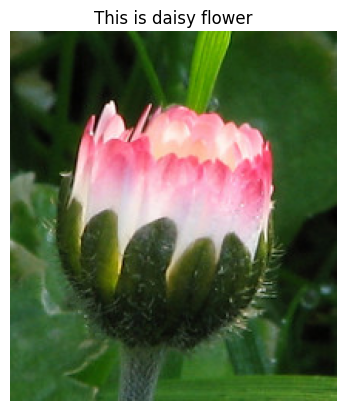

In [20]:
if __name__ == "__main__":
  path = input("Enter path image here: ")
  img = cv2.imread(path)
  img_ = img[:, :, :: -1]
  resize_img = cv2.resize(img, (100, 100))
  img_preprocessing = resize_img.reshape(1, (resize_img.shape[0] * resize_img.shape[1] * resize_img.shape[2]))
  labels = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
  answer = model.predict(img_preprocessing)
  text = f"This is {labels[answer[0]]} flower"
  if labels[answer[0]] == "sunflower": text = f"This is {labels[answer[0]]}"
  plt.title(text)
  plt.imshow(img_)
  plt.axis(False)
  plt.show()